In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import  roc_auc_score, roc_curve,confusion_matrix,ConfusionMatrixDisplay

In [45]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [46]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [47]:
print(df.head())
print(df.tail())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
       gender   age  hypertension  heart_disease smoking_history    bmi  \
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          fo

In [48]:
X = df.drop("heart_disease", axis=1)
y = df["heart_disease"]


In [49]:
X = pd.get_dummies(
    X,
    columns=["gender", "smoking_history"],
    drop_first=True
)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [51]:
model = DecisionTreeClassifier()


In [52]:
model.fit(X_train, y_train)


y_pred = model.predict(X_test)



In [53]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9267

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     19212
           1       0.12      0.13      0.13       788

    accuracy                           0.93     20000
   macro avg       0.54      0.55      0.54     20000
weighted avg       0.93      0.93      0.93     20000


Confusion Matrix:

[[18428   784]
 [  682   106]]


In [54]:
y_prob = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)


AUC Score: 0.5482274456214442


In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

print("False Positive Rate (FPR):", fpr[:5])
print("True Positive Rate (TPR):", tpr[:5])
print("Thresholds:", thresholds[:5])


False Positive Rate (FPR): [0.         0.04080783 0.04299396 0.04330627 0.04413908]
True Positive Rate (TPR): [0.         0.13451777 0.13705584 0.13705584 0.13705584]
Thresholds: [       inf 1.         0.5        0.4        0.33333333]


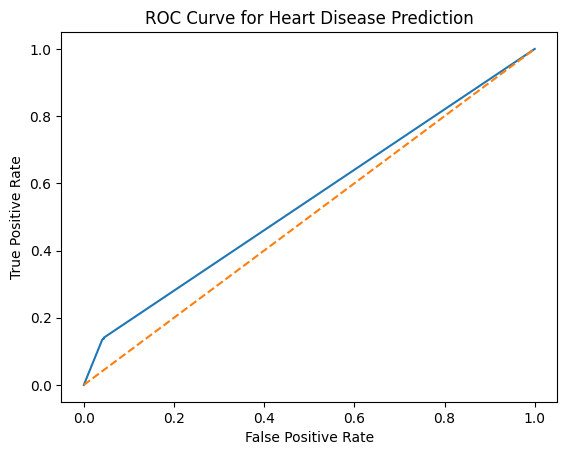

In [58]:
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Heart Disease Prediction")
plt.show()


Confusion Matrix:
 [[18428   784]
 [  682   106]]


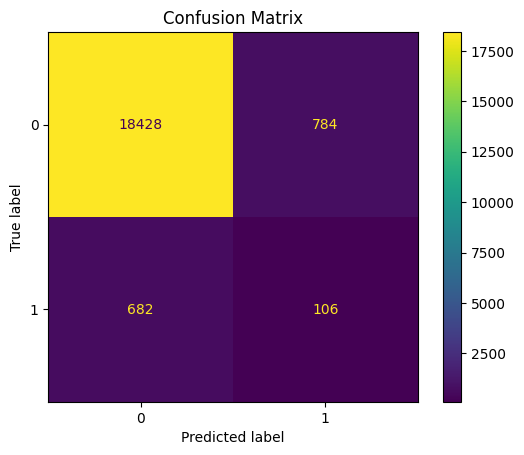

In [57]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()
